# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from datetime import datetime, timedelta
import nltk as nltk
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
from collections import Counter
from nltk import ngrams
from nltk.corpus import stopwords, reuters

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

%matplotlib inline
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ananthigokul/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Load .env enviroment variables
load_dotenv()

# Read your api key environment variable
news_api_key = os.getenv("NEWS_API_KEY")
print (news_api_key)

b011deb799c1445e868b4c1defd6a8c1


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key) 

In [4]:
#function to retrieve news articles 
def news_articles(text):
    headlines = newsapi.get_everything(
        q=text,
        language="en",
        page_size=100,
        sort_by="relevancy"
    )

    # Print total articles
    print(f"Total articles : {headlines['totalResults']}")

    # Show sample article
    headlines["articles"][0]
    return headlines

# Fetch the Bitcoin news articles
news_bitcoin = news_articles('bitcoin')
#print (news_bitcoin)

Total articles : 7189


In [5]:
# Fetch the Ethereum news articles
news_ethereum = news_articles('ethereum')

Total articles : 2427


In [6]:
# Create the Bitcoin sentiment scores DataFrame
def create_sentiment_score_dataframe(headlines):
    sentiments = []

    for article in headlines["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu

            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)

    # Reorder DataFrame columns
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    df = df[cols]

    return df

df_bitcoin = create_sentiment_score_dataframe(news_bitcoin)
#df_bitcoin = df_bitcoin.sort_values(by='compound', ascending=False) ## for finding the highest compound 
df_bitcoin = df_bitcoin.sort_values(by='positive', ascending=False) ## for finding the highest positive  
df_bitcoin.head()

,date,text,compound,positive,negative,neutral
56,2021-07-14,"As the crypto payments\r\n market gains steam,...",0.8658,0.276,0.0,0.724
26,2021-07-26,Posted \r\nCryptocurrencies popped to the top ...,0.8834,0.274,0.0,0.726
91,2021-07-10,Ive just visited the Kaseya website. We Are Ka...,0.8442,0.258,0.0,0.742
67,2021-07-27,Children begin by loving their parents. After ...,0.7184,0.250,0.0,0.750
40,2021-07-10,Bitcoin\r\nNurphoto / Getty Images\r\nA swath ...,0.7506,0.209,0.0,0.791


In [7]:
# Create the Ethereum sentiment scores DataFrame
df_ethereum = create_sentiment_score_dataframe(news_ethereum)
#df_ethereum = df_ethereum.sort_values(by='compound', ascending=False) ## for finding the highest compound 
df_ethereum = df_ethereum.sort_values(by='positive', ascending=False) ## for finding the highest positive  
df_ethereum.head()


,date,text,compound,positive,negative,neutral
69,2021-08-04,"LONDON, Aug 4 (Reuters) - Global shares were d...",0.7430,0.201,0.0,0.799
3,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.0,0.810
72,2021-08-06,"* European, Asian shares fall 0.1%\r\n* Thai b...",0.7351,0.188,0.0,0.812
70,2021-08-05,HONG KONG (Reuters) - Asian shares held on to ...,0.7269,0.186,0.0,0.814
42,2021-08-01,Stablecoins are a type of cryptocurrency linke...,0.7506,0.183,0.0,0.817


In [8]:
# Describe the Bitcoin Sentiment
df_bitcoin.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.097618,0.060320,0.034600,0.905080
std,0.389975,0.070401,0.056701,0.084561
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.058000,0.000000,0.000000,0.849000
50%,0.000000,0.049500,0.000000,0.919500
75%,0.386825,0.092000,0.066250,1.000000
max,0.883400,0.276000,0.287000,1.000000


In [9]:
# Describe the Ethereum Sentiment
df_ethereum.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.137926,0.054710,0.023040,0.92224
std,0.339519,0.062017,0.046367,0.07455
min,-0.812600,0.000000,0.000000,0.71400
25%,0.000000,0.000000,0.000000,0.87300
50%,0.000000,0.045000,0.000000,0.92900
75%,0.401900,0.090000,0.032250,1.00000
max,0.750600,0.201000,0.249000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum 

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = set(stopwords.words('english')) 
print (len(stop_words))

179


In [11]:
# Complete the tokenizer function
def tokenizer(text_df):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    filtered_sentence = []
    tokens = []
    for row in text_df.itertuples(index=True, name='Pandas'):
        text = row.text
        
        re_clean = regex.sub('', text)

        # Create a tokenized list of the words
        word_tokens = word_tokenize(re_clean)
        
        # Lemmatize words into root words
        lem = [lemmatizer.lemmatize(word) for word in word_tokens]

        # Convert the words to lowercase
        output = [word.lower() for word in lem if word.lower() not in stop_words]
        
        #output = process_text(text)
        
        # Remove the stop words
        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w) 
            #else:
                #print (w)

        #print("\n\nOriginal Sentence \n\n")
        #print(" ".join(word_tokens)) 

        #print("\n\nFiltered Sentence \n\n")
        #print(" ".join(filtered_sentence)) 
        ## TODO check with tutor 
        tokens = filtered_sentence
    
    return tokens

In [12]:
# Create a new tokens column for Bitcoin
tokens_bitcoin = tokenizer(df_bitcoin['text'].to_frame())
#print (tokens_bitcoin)

In [13]:
# Create a new tokens column for Ethereum
tokens_ethereum = tokenizer(df_ethereum['text'].to_frame())
#print (df_ethereum['text'])
print (tokens_ethereum)

['LONDON', 'Aug', 'Reuters', 'Global', 'shares', 'driven', 'strong', 'earnings', 'record', 'high', 'Wednesday', 'dollar', 'Treasury', 'yields', 'languished', 'waiting', 'US', 'employment', 'data', 'provide', 'clues', 'chars', 'Cent', 'founded', 'adfree', 'creator', 'network', 'allows', 'users', 'offer', 'crypto', 'rewards', 'good', 'posts', 'comments', 'like', 'gifting', 'awards', 'Reddit', 'Ethereum', 'But', 'chars', 'European', 'Asian', 'shares', 'fall', 'Thai', 'baht', 'leads', 'FX', 'falls', 'rising', 'Delta', 'cases', 'US', 'jobs', 'report', 'due', 'GMT', 'hoped', 'robustLONDONHONG', 'KONG', 'Aug', 'Reuters', 'Stocks', 'emerging', 'mark', 'chars', 'HONG', 'KONG', 'Reuters', 'Asian', 'shares', 'held', 'recent', 'gains', 'morning', 'trading', 'Thursday', 'despite', 'hawkish', 'remarks', 'senior', 'official', 'US', 'Federal', 'Reserve', 'boosted', 'dollar', 'chars', 'Stablecoins', 'type', 'cryptocurrency', 'linked', 'asset', 'like', 'US', 'dollar', 'doesnt', 'change', 'much', 'valueT

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [14]:
from collections import Counter
from nltk import ngrams

In [15]:
def process_text(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [16]:
# Generate the Bitcoin N-grams where N=2
for row in df_bitcoin.itertuples(index=True, name='Pandas'):
    processed = process_text(row.text)
    #print(processed)
    bigram_counts_bitcoin = Counter(ngrams(processed, n=2))
    #print(dict(bigram_counts))

In [17]:
# Generate the Ethereum N-grams where N=2
for row in df_ethereum.itertuples(index=True, name='Pandas'):
    processed = process_text(row.text)
    #print(processed)
    bigram_counts_ethereum = Counter(ngrams(processed, n=2))
    #print(dict(bigram_counts))

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bigram_counts_bitcoin, 10)

[(('article', 'wa'), 1),
 (('wa', 'translated'), 1),
 (('translated', 'spanish'), 1),
 (('spanish', 'edition'), 1),
 (('edition', 'using'), 1),
 (('using', 'ai'), 1),
 (('ai', 'technology'), 1),
 (('technology', 'errors'), 1),
 (('errors', 'may'), 1),
 (('may', 'exist'), 1)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
token_count(bigram_counts_ethereum, 10)

[(('english', 'artist'), 1),
 (('artist', 'damien'), 1),
 (('damien', 'hirsts'), 1),
 (('hirsts', 'latest'), 1),
 (('latest', 'project'), 1),
 (('project', 'currency'), 1),
 (('currency', 'artwork'), 1),
 (('artwork', 'two'), 1),
 (('two', 'form'), 1),
 (('form', 'physical'), 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

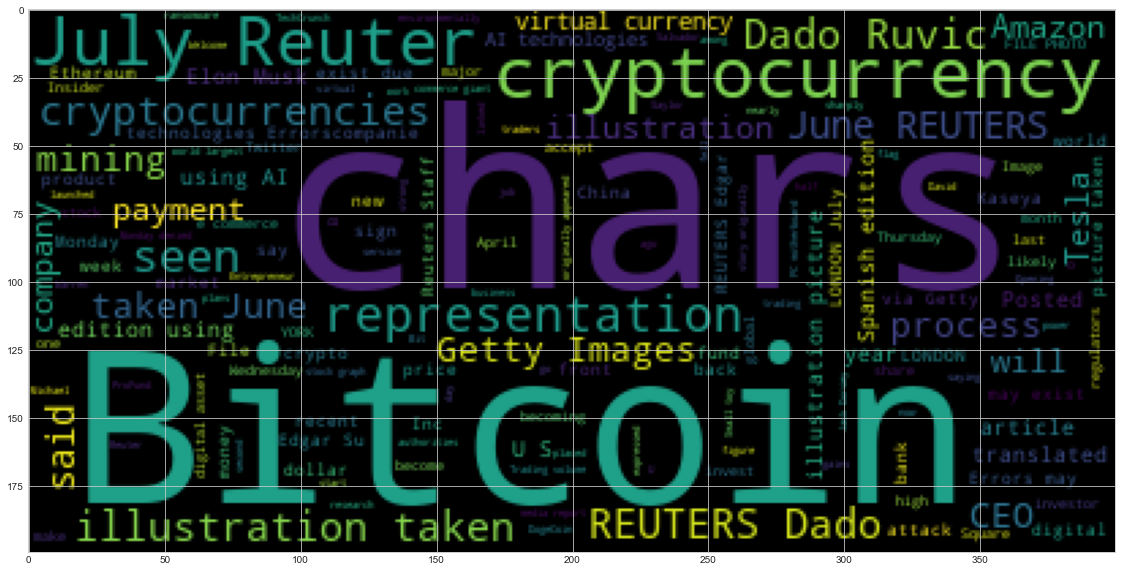

In [22]:
# Generate the Bitcoin word cloud
def full_text(df):
    text = ''
    for row in df.itertuples(index=True, name='Pandas'):
        #print (row.text)
        text+=row.text
    return text

input_text_bitcoin = full_text(df_bitcoin)


wc = WordCloud().generate(input_text_bitcoin)
plt.imshow(wc)

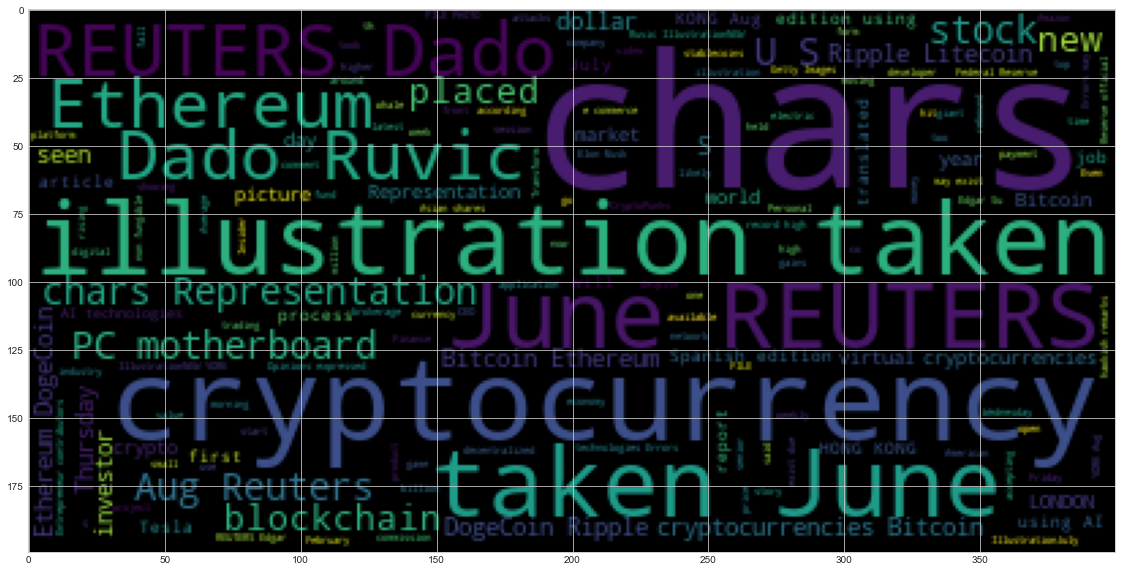

In [23]:
# Generate the Ethereum word cloud

#df_bitcoin_sliced = df_ethereum.iloc[1]#.to_frame()
#input_text = df_bitcoin_sliced['text']#.astype(str)

input_text_ethereum = full_text(df_ethereum)
wc = WordCloud().generate(input_text_ethereum)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
doc_bitcoin = nlp(input_text_bitcoin)

In [28]:
# Run the NER processor on all of the text
displacy.render(doc_bitcoin, style='ent')

# Add a title to the document ##TODO 
doc_bitcoin.user_data["title"] = "Bitcoin NER"

In [29]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

NameError: name 'doc' is not defined

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
#input_text_ethereum 

In [ ]:
# Run the NER processor on all of the text
doc_ethereum = nlp(input_text_ethereum)


# Add a title to the document
doc_ethereum.user_data["title"] = "Ethereum NER"

In [ ]:
# Render the visualization
displacy.render(doc_ethereum, style='ent')

In [ ]:
# List all Entities
print([ent.text for ent in doc_ethereum.ents if ent.label_ == 'GPE'])

---